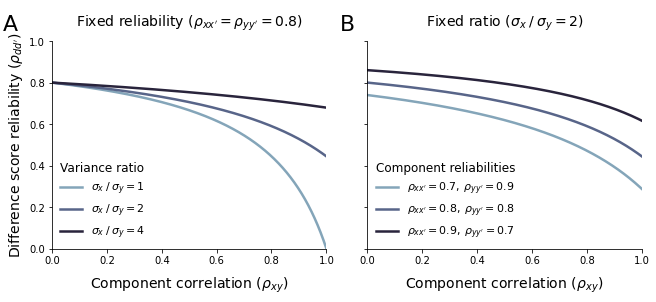

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import dirname
ROOT_DIR = dirname(os.path.realpath('__file__'))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define measure parameters.
rho_tt = np.linspace(0,1,1001)             # Task measure correlation
 
## Define plotting paramters.
palette = sns.color_palette("ch:start=.2,rot=-.3", n_colors=4, desat=0.8)[1:]

## Initialize canvas.
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=True)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel A: Unequal variances.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define task reliabilities.
rho_xx = rho_yy = 0.8

## Define ratios.
ratios = np.array([1,2,4])

## Define task variances.
sigma_x = 1; sigma_y = sigma_x * ratios

## Compute observed correlations.
rho_xy = rho_tt * np.sqrt(rho_xx * rho_yy)

## Compute reliability.
a = sigma_x**2 * rho_xx + sigma_y**2 * rho_yy - 2 * np.outer(rho_xy, sigma_x * sigma_y)
b = sigma_x**2 + sigma_y**2 - 2 * np.outer(rho_xy, sigma_x * sigma_y)
reliability = a / b

## Plot reliability.
for rel, label, color in zip(reliability.T, ratios, palette): 
    axes[0].plot(rho_tt, rel, lw=2.5, label=r'$\sigma_x\:/\:\sigma_y = %0.0f$' %label, color=color)

## Add detail.
axes[0].set(xlim=(0,1), ylim=(0,1))
axes[0].set_title(r"Fixed reliability $(\rho_{xx'} = \rho_{yy'} = 0.8)$", fontsize=14, pad=15)
axes[0].annotate('A', (0,0), (0.005, 1.00), 'figure fraction', ha='left', va='top', fontsize=22)
axes[0].set_xlabel(r"Component correlation ($\rho_{xy}$)", fontsize=14, labelpad=10)
axes[0].set_ylabel(r"Difference score reliability ($\rho_{dd'}$)", fontsize=14)
    
## Add legend.
legend = axes[0].legend(loc=3,  frameon=False, fontsize=11, borderpad=0.25, title=r'Variance ratio')
plt.setp(legend.get_title(), fontsize=12)
legend._legend_box.align = "left"

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel B: Unequal reliabilities.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define task reliabilities.
rho_xx = np.array([0.7, 0.8, 0.9])
rho_yy = np.array([0.9, 0.8, 0.7])

## Define ratios.
ratio = 0.5

## Define task variances.
sigma_x = 1; sigma_y = sigma_x * ratio

## Compute observed correlations.
rho_xy = np.outer(rho_tt, np.sqrt(rho_xx * rho_yy))

## Compute reliability.
a = sigma_x**2 * rho_xx + sigma_y**2 * rho_yy - 2 * rho_xy * sigma_x * sigma_y
b = sigma_x**2 + sigma_y**2 - 2 * rho_xy * sigma_x * sigma_y
reliability = a / b

## Plot reliability.
for rel, x, y, color in zip(reliability.T, rho_xx, rho_yy, palette): 
    label = r"$\rho_{xx'}=%0.1f,\:\rho_{yy'} = %0.1f$" %(x,y)
    axes[1].plot(rho_tt, rel, lw=2.5, label=label, color=color)

## Add detail.
axes[1].set(xlim=(0,1), ylim=(0,1))
axes[1].set_title(r"Fixed ratio $(\sigma_x\:/\:\sigma_y=2)$", fontsize=14, pad=15)
axes[1].annotate('B', (0,0), (0.525, 1.00), 'figure fraction', ha='left', va='top', fontsize=22)
axes[1].set_xlabel(r"Component correlation ($\rho_{xy}$)", fontsize=14, labelpad=10)
    
## Add legend.
legend = axes[1].legend(loc=3,  frameon=False, fontsize=11, borderpad=0.25, 
                        title=r'Component reliabilities')
plt.setp(legend.get_title(), fontsize=12)
legend._legend_box.align = "left"

## Save figure.
sns.despine()
plt.subplots_adjust(left=0.07, right=0.98, top=0.88, bottom=0.16, wspace=0.15, hspace=0)
plt.savefig(os.path.join(ROOT_DIR, '..', 'figures', 'fig02.png'), transparent=True, dpi=100)